In [3]:
import spacy
import json

In [4]:
def load_data(file):
    with open (file, "r", encoding="utf-8") as f:
        data = json.load(f)
    return (data)

def write_data(file, data):
    with open (file, "w", encoding="utf-8") as f:
        json.dump(data, f, indent=4)

In [5]:
nlp = spacy.load("NER_2.0")

In [6]:
docs = load_data("TEST_test3.json")
print (docs[10])

['“Yeah, it’s true,” said Harry. Neville laughed gleefully. “What did you do with the dragon?” “Released it into the wild,” said Ron. “Hermione was all for keeping it as a pet —”', {'entities': [[24, 29, 'CHARACTER'], [31, 38, 'CHARACTER'], [84, 90, 'CREATURE'], [127, 130, 'CHARACTER'], [133, 141, 'CHARACTER']]}]


In [7]:
from spacy.training import offsets_to_biluo_tags
def get_cleaned_label(label: str):
    if "-" in label:
        return label.split("-")[1]
    else:
        return label
    
def create_total_target_vector(docs):
    target_vector = []
    for doc in docs:
        print (doc)
        new = nlp.make_doc(doc[0])
        entities = doc[1]["entities"]
        bilou_entities = offsets_to_biluo_tags(new, entities)
        final = []
        for item in bilou_entities:
            final.append(get_cleaned_label(item))
        target_vector.extend(final)
    return target_vector

In [8]:
def create_prediction_vector(text):
    return [get_cleaned_label(prediction) for prediction in get_all_ner_predictions(text)]

def create_total_prediction_vector(docs: list):
    prediction_vector = []
    for doc in docs:
        prediction_vector.extend(create_prediction_vector(doc[0]))
    return prediction_vector

def get_all_ner_predictions(text):
    doc = nlp(text)
    entities = [(e.start_char, e.end_char, e.label_) for e in doc.ents]
    bilou_entities = offsets_to_biluo_tags(doc, entities)
    return bilou_entities

In [9]:
def get_model_labels():
    labels = list(nlp.get_pipe("ner").labels)
    labels.append("O")
    return sorted(labels)
def get_dataset_labels():
    return sorted(set(create_total_target_vector(docs)))

In [10]:
sorted(set(create_total_target_vector(docs)))

['eville — what the — how — ?” But Neville had spotted Ron and Hermione, and with yells of delight was hugging them too. The longer Harry looked at Neville, the worse he appeared: One of his eyes was swollen yellow and purple, there were gouge marks on his face, and his general air of unkemptness suggested that he had been living rough. Nevertheless, his battered visage shone with happiness as he let go of Hermione and said again, “I knew you’d come! Kept telling Seamus it was a matter of time!”', {'entities': [[33, 40, 'CHARACTER'], [53, 56, 'CHARACTER'], [61, 69, 'CHARACTER'], [130, 135, 'CHARACTER'], [146, 153, 'CHARACTER'], [408, 416, 'CHARACTER'], [466, 472, 'CHARACTER']]}]
['“Neville, what’s happened to you?” “What? This?” Neville dismissed his injuries with a shake of the head. “This is nothing. Seamus is worse. You’ll see. Shall we get going then? Oh,” he turned to Aberforth, “Ab, there might be a couple more people on the way.”', {'entities': [[1, 8, 'CHARACTER'], [49, 56, 'CH

['There was silence in the Hall now, the kind of silence that presses against the eardrums, that seems too huge to be contained by walls. “Give me Harry Potter,” said Voldemort’s voice, “and none shall be harmed. Give me Harry Potter, and I shall leave the school untouched. Give me Harry Potter, and you will be rewarded. “You have until midnight.”', {'entities': [[145, 157, 'CHARACTER'], [219, 231, 'CHARACTER'], [281, 293, 'CHARACTER']]}]
['The silence swallowed them all again. Every head turned, every eye in the place seemed to have found Harry, to hold him frozen in the glare of thousands of invisible beams. Then a figure rose from the Slytherin table and he recognized Pansy Parkinson as she raised a shaking arm and screamed, “But he’s there! Potter’s there! Someone grab him!” Before Harry could speak, there was a massive movement. The Gryffindors in front of him had risen and stood facing, not Harry, but the Slytherins. Then the Hufflepuffs stood, and almost at the same moment, the 

['Petunia glanced around. The playground was deserted apart from themselves and, though the girls did not know it, Snape. Lily had picked up a fallen flower from the bush behind which Snape lurked. Petunia advanced, evidently torn between curiosity and disapproval. Lily waited until Petunia was near enough to have a clear view, then held out her palm. The flower sat there, opening and closing its petals, like some bizarre, many-lipped oyster.', {'entities': [[0, 7, 'CHARACTER'], [113, 118, 'CHARACTER'], [120, 124, 'CHARACTER'], [182, 187, 'CHARACTER'], [196, 203, 'CHARACTER'], [264, 268, 'CHARACTER'], [282, 289, 'CHARACTER']]}]
['“Stop it!” shrieked Petunia. “It’s not hurting you,” said Lily, but she closed her hand on the blossom and threw it back to the ground. “It’s not right,” said Petunia, but her eyes had followed the flower’s flight to the ground and lingered upon it. “How do you do it?” she added, and there was definite longing in her voice. “It’s obvious, isn’t it?” Snape coul

['“Ron, for heaven’s sake,” said Hermione, half stern, half amused. “Don’t try to turn them against each other before they’ve even started school!” “You’re right, sorry,” said Ron, but unable to help himself, he added, “Don’t get too friendly with him, though, Rosie. Granddad Weasley would never forgive you if you married a pureblood.” “Hey!”', {'entities': [[1, 4, 'CHARACTER'], [31, 39, 'CHARACTER'], [174, 177, 'CHARACTER'], [275, 282, 'CHARACTER']]}]
['James had reappeared; he had divested himself of his trunk, owl, and trolley, and was evidently bursting with news. “Teddy’s back there,” he said breathlessly, pointing back over his shoulder into the billowing clouds of steam. “Just seen him! And guess what he’s doing? Snogging Victoire!” He gazed up at the adults, evidently disappointed by the lack of reaction. “Our Teddy! Teddy Lupin! Snogging our Victoire! Our cousin! And I asked Teddy what he was doing —”', {'entities': [[0, 5, 'CHARACTER'], [384, 389, 'CHARACTER']]}]
['“You inter

['Cho looked up, the parcel only half-attached to the owl’s legs. “That Umbridge woman’s foul,” she said in a low voice. “Putting you in detention just because you told the truth about how — how — how he died. Everyone heard about it, it was all over the school. You were really brave standing up to her like that.”', {'entities': [[0, 3, 'CHARACTER'], [70, 78, 'CHARACTER']]}]
['Harry’s insides reinflated so rapidly he felt as though he might actually float a few inches off the dropping-strewn floor. Who cared about a stupid flying horse, Cho thought he had been really brave. . . . For a moment he considered accidentally-on-purpose showing her his cut hand as he helped her tie her parcel onto her owl. . . . But the very instant that this thrilling thought occurred, the Owlery door opened again.', {'entities': [[0, 5, 'CHARACTER'], [163, 166, 'CHARACTER']]}]
['Filch, the caretaker, came wheezing into the room. There were purple patches on his sunken, veined cheeks, his jowls were aquiver 

['“But Professor, who’s insulting you?” asked Parvati timidly. “The establishment!” said Professor Trelawney in a deep, dramatic, wavering voice. “Yes, those with eyes too clouded by the Mundane to See as I See, to Know as I Know . . . Of course, we Seers have always been feared, always persecuted. . . . It is — alas — our fate . . .” She gulped, dabbed at her wet cheeks with the end of her shawl, and then pulled a small, embroidered handkerchief from her sleeve, into which she blew her nose very hard with a sound like Peeves blowing a raspberry. Ron sniggered. Lavender shot him a disgusted look. “Professor,” said Parvati, “do you mean  .  .  . is it something Professor Umbridge . . . ?”', {'entities': [[44, 51, 'CHARACTER'], [87, 106, 'CHARACTER'], [523, 529, 'CHARACTER'], [551, 554, 'CHARACTER'], [566, 574, 'CHARACTER'], [620, 627, 'CHARACTER'], [667, 685, 'CHARACTER']]}]
['“Do not speak to me about that woman!” cried Professor Trelawney, leaping to her feet, her beads rattling and h

['"Now what?" said Aunt Petunia, looking furiously at Harry as though he\'d planned this. Harry knew he ought to feel sorry that Mrs. Figg had broken her leg, but it wasn\'t easy when he reminded himself it would be a whole year before he had to look at Tibbles, Snowy, Mr. Paws, and Tufty again.', {'entities': [[17, 29, 'CHARACTER'], [52, 57, 'CHARACTER'], [87, 92, 'CHARACTER'], [126, 135, 'CHARACTER']]}]
['"We could phone Marge," Uncle Vernon suggested.', {'entities': [[16, 21, 'CHARACTER'], [24, 36, 'CHARACTER']]}]
['"Don\'t be silly, Vernon, she hates the boy."', {'entities': [[17, 23, 'CHARACTER']]}]
["The Dursleys often spoke about Harry like this, as though he wasn't there -- or rather, as though he was something very nasty that couldn't understand them, like a slug.", {'entities': [[31, 36, 'CHARACTER']]}]
['"On vacation in Majorca," snapped Aunt Petunia.', {'entities': [[34, 46, 'CHARACTER']]}]
['"You could just leave me here," Harry put in hopefully (he\'d be able to watch wha

['“Harry!” she said. “You gave us such a fright — come in — how’s your arm?”', {'entities': [[1, 6, 'CHARACTER']]}]
['“Fine,” said Harry, squeezing into the stall. An old cauldron was perched on the toilet, and a crackling from under the rim told Harry they had lit a fire beneath it. Conjuring up portable, waterproof fires was a speciality of Hermione’s. “We’d’ve come to meet you, but we decided to get started on the Polyjuice Potion,” Ron explained as Harry, with difficulty, locked the stall again. “We’ve decided this is the safest place to hide it.” Harry started to tell them about Colin, but Hermione interrupted.', {'entities': [[13, 18, 'CHARACTER'], [129, 134, 'CHARACTER'], [227, 235, 'CHARACTER'], [303, 319, 'POTION'], [322, 325, 'CHARACTER'], [339, 344, 'CHARACTER'], [440, 445, 'CHARACTER'], [473, 478, 'CHARACTER'], [484, 492, 'CHARACTER']]}]
['“We already know — we heard Professor McGonagall telling Professor Flitwick this morning. That’s why we decided we’d better get going —”

['CHARACTER', 'CREATURE', 'EVENT', 'O', 'PLACE', 'POTION', 'SPELL']

In [11]:
from sklearn.metrics import confusion_matrix

def generate_confusion_matrix(docs): 
    classes = sorted(set(create_total_target_vector(docs)))
    y_true = create_total_target_vector(docs)
    y_pred = create_total_prediction_vector(docs)

    print (y_true)
    print (y_pred)
    return confusion_matrix(y_true, y_pred, classes)

In [12]:
generate_confusion_matrix(docs)

['eville — what the — how — ?” But Neville had spotted Ron and Hermione, and with yells of delight was hugging them too. The longer Harry looked at Neville, the worse he appeared: One of his eyes was swollen yellow and purple, there were gouge marks on his face, and his general air of unkemptness suggested that he had been living rough. Nevertheless, his battered visage shone with happiness as he let go of Hermione and said again, “I knew you’d come! Kept telling Seamus it was a matter of time!”', {'entities': [[33, 40, 'CHARACTER'], [53, 56, 'CHARACTER'], [61, 69, 'CHARACTER'], [130, 135, 'CHARACTER'], [146, 153, 'CHARACTER'], [408, 416, 'CHARACTER'], [466, 472, 'CHARACTER']]}]
['“Neville, what’s happened to you?” “What? This?” Neville dismissed his injuries with a shake of the head. “This is nothing. Seamus is worse. You’ll see. Shall we get going then? Oh,” he turned to Aberforth, “Ab, there might be a couple more people on the way.”', {'entities': [[1, 8, 'CHARACTER'], [49, 56, 'CH

['He moved down the steps and out into the darkness. It was nearly four in the morning, and the deathly stillness of the grounds felt as though they were holding their breath, waiting to see whether he could do what he must. Harry moved toward Neville, who was bending over another body. “Neville.”', {'entities': [[223, 228, 'CHARACTER'], [242, 249, 'CHARACTER'], [287, 294, 'CHARACTER']]}]
['“Blimey, Harry, you nearly gave me heart failure!” Harry had pulled off the Cloak: The idea had come to him out of nowhere, born out of a desire to make absolutely sure. “Where are you going, alone?” Neville asked suspiciously. “It’s all part of the plan,” said Harry. “There’s something I’ve got to do. Listen — Neville —” “Harry!” Neville looked suddenly scared. “Harry, you’re not thinking of handing yourself over?” “No,” Harry lied easily. “’Course not  .  .  . this is something else. But I might be out of sight for a while. You know Voldemort’s snake, Neville? He’s got a huge snake. . . . Calls it

['“You got that stuff off, then?” “Yeah,” said Harry, trying to grin as though the memory of their last meeting was funny as opposed to mortifying. “So did you . . . er . . . have a good summer?” The moment he had said this he wished he hadn’t: Cedric had been Cho’s boyfriend and the memory of his death must have affected her holiday almost as badly as it had affected Harry’s. . . . Something seemed to tauten in her face, but she said, “Oh, it was all right, you know . . .” “Is that a Tornados badge?” Ron demanded suddenly, pointing at the front of Cho’s robes, to which a sky-blue badge emblazoned with a double gold T was pinned. “You don’t support them, do you?”', {'entities': [[45, 50, 'CHARACTER'], [243, 249, 'CHARACTER'], [259, 262, 'CHARACTER'], [369, 374, 'CHARACTER'], [505, 508, 'CHARACTER'], [553, 556, 'CHARACTER']]}]
['“Yeah, I do,” said Cho. “Have you always supported them, or just since they started winning the league?” said Ron, in what Harry considered an unnecessarily acc

['“The prefects as well?” said Fred, looking quizzically at Ron and Hermione. “Of course,” said Hermione coolly. “Here comes Ernie and Hannah Abbott,” said Ron, looking over his shoulder. “And those Ravenclaw blokes and Smith  .  .  . and no one looks very spotty.” Hermione looked alarmed. “Never mind spots, the idiots can’t come over here now, it’ll look really suspicious — sit down!” she mouthed to Ernie and Hannah, gesturing frantically to them to rejoin the Hufflepuff table. “Later! We’ll — talk — to — you — later!” “I’ll tell Michael,” said Ginny impatiently, swinging herself off her bench. “The fool, honestly . . .”', {'entities': [[29, 33, 'CHARACTER'], [58, 61, 'CHARACTER'], [66, 74, 'CHARACTER'], [94, 102, 'CHARACTER'], [123, 128, 'CHARACTER'], [133, 146, 'CHARACTER'], [154, 157, 'CHARACTER'], [197, 206, 'CHARACTER'], [218, 223, 'CHARACTER'], [264, 272, 'CHARACTER'], [402, 407, 'CHARACTER'], [412, 418, 'CHARACTER'], [464, 474, 'CHARACTER'], [535, 542, 'CHARACTER'], [550, 555, 

["But Uncle Vernon didn't believe him. No one ever did.", {'entities': [[4, 16, 'CHARACTER']]}]
["The problem was, strange things often happened around Harry and it was just no good telling the Dursleys he didn't make them happen.", {'entities': [[54, 59, 'CHARACTER']]}]
['Once, Aunt Petunia, tired of Harry coming back from the barbers looking as though he hadn\'t been at all, had taken a pair of kitchen scissors and cut his hair so short he was almost bald except for his bangs, which she left "to hide that horrible scar." Dudley had laughed himself silly at Harry, who spent a sleepless night imagining school the next day, where he was already laughed at for his baggy clothes and taped glasses. Next morning, however, he had gotten up to find his hair exactly as it had been before Aunt Petunia had sheared it off He had been given a week in his cupboard for this, even though he had tried to explain that he couldn\'t explain how it had grown back so quickly.', {'entities': [[6, 18, 'CHARA

['“It’s hidden in Hagrid’s hut, is it?” said Umbridge eagerly in Harry’s ear. “Of course not,” said Hermione scathingly. “Hagrid might have set it off accidentally.”', {'entities': [[16, 22, 'CHARACTER'], [43, 51, 'CHARACTER'], [63, 68, 'CHARACTER'], [98, 106, 'CHARACTER'], [120, 126, 'CHARACTER']]}]
['“Yes,” said Umbridge, whose excitement seemed to be mounting. “Yes, he would have done, of course, the great half-breed oaf . . .” She laughed. Harry felt a strong urge to swing around and seize her by the throat, but resisted. His scar was throbbing in the soft evening air but it had not yet burned white-hot, as he knew it would if Voldemort had moved in for the kill. . . .', {'entities': [[12, 21, 'CHARACTER'], [144, 149, 'CHARACTER']]}]
['“Then . . . where is it?” asked Umbridge, with a hint of uncertainty in her voice as Hermione continued to stride toward the forest. “In there, of course,” said Hermione, pointing into the dark trees. “It had to be somewhere that students weren’t goi

['The Great Hall seemed to fly away, become smaller, shrink, as Harry reeled backward from the doorway. He could not draw breath. He could not bear to look at any of the other bodies, to see who else had died for him. He could not bear to join the Weasleys, could not look into their eyes, when if he had given himself up in the first place, Fred might never have died. . . . He turned away and ran up the marble staircase. Lupin, Tonks  .  .  . He yearned not to feel . . . He wished he could rip out his heart, his innards, everything that was screaming inside him. . . .', {'entities': [[4, 9, 'CHARACTER'], [62, 67, 'CHARACTER'], [340, 344, 'CHARACTER'], [422, 428, 'CHARACTER'], [429, 434, 'CHARACTER']]}]
['The castle was completely empty; even the ghosts seemed to have joined the mass mourning in the Great Hall. Harry ran without stopping, clutching the crystal flask of Snape’s last thoughts, and he did not slow down until he reached the stone gargoyle guarding the headmaster’s office. “P

['Defense Against the Dark Arts A Return to Basic Principles “Well now, your teaching in this subject has been rather disrupted and fragmented, hasn’t it?” stated Professor Umbridge, turning to face the class with her hands clasped neatly in front of her. “The constant changing of teachers, many of whom do not seem to have followed any Ministry\x02approved curriculum, has unfortunately resulted in your being far below the standard we would expect to see in your O.W.L. year.', {'entities': [[161, 180, 'CHARACTER']]}]
['For a couple of minutes the room was full of the sound of scratching quills on parchment. When everyone had copied down Professor Umbridge’s three course aims she said, “Has everybody got a copy of Defensive Magical Theory by Wilbert Slinkhard?” There was a dull murmur of assent throughout the class. “I think we’ll try that again,” said Professor Umbridge. “When I ask you a question, I should like you to reply ‘Yes, Professor Umbridge,’ or ‘No, Professor Umbridge.’ So, ha

['“You do?” said Harry, his heart lifting. “Of course I do!” said Sirius. “D’you think your father and I would’ve lain down and taken orders from an old hag like Umbridge?” “But — last term all you did was tell me to be careful and not take risks —” “Last year all the evidence was that someone inside Hogwarts was trying to kill you, Harry!” said Sirius impatiently. “This year we know that there’s someone outside Hogwarts who’d like to kill us all, so I think learning to defend yourselves properly is a very good idea!” “And if we do get expelled?” Hermione asked, a quizzical look on her face.', {'entities': [[15, 20, 'CHARACTER'], [64, 70, 'CHARACTER'], [160, 168, 'CHARACTER'], [300, 308, 'PLACE'], [333, 338, 'CHARACTER'], [346, 352, 'CHARACTER'], [414, 422, 'PLACE'], [551, 559, 'CHARACTER']]}]
['“Hermione, this whole thing was your idea!” said Harry, staring at her. “I know it was.  .  .  . I just wondered what Sirius thought,” she said, shrugging. “Well, better expelled and able to de

['Uncle Vernon stopped at last outside a gloomy-looking hotel on the outskirts of a big city. Dudley and Harry shared a room with twin beds and damp, musty sheets. Dudley snored but Harry stayed awake, sitting on the windowsill, staring down at the lights of passing cars and wondering....', {'entities': [[0, 12, 'CHARACTER'], [92, 98, 'CHARACTER'], [103, 108, 'CHARACTER'], [162, 168, 'CHARACTER'], [180, 185, 'CHARACTER']]}]
['"\'Scuse me, but is one of you Mr. H. Potter? Only I got about an \'undred of these at the front desk."', {'entities': [[37, 43, 'CHARACTER']]}]
['Mr. H. Potter', {'entities': [[7, 13, 'CHARACTER']]}]
['Harry made a grab for the letter but Uncle Vernon knocked his hand out of the way. The woman stared.', {'entities': [[0, 5, 'CHARACTER'], [37, 49, 'CHARACTER']]}]
['"I\'ll take them," said Uncle Vernon, standing up quickly and following her from the dining room.', {'entities': [[23, 35, 'CHARACTER']]}]
['Wouldn\'t it be better just to go home, dear?" Aunt Petunia s

['Harry grabbed Hermione and pulled her to the ground. Facedown on the forest floor he knew a moment of terror as hooves thundered around him, but the centaurs leapt over and around them, bellowing and screaming with rage.', {'entities': [[0, 5, 'CHARACTER'], [14, 22, 'CHARACTER']]}]
['“Nooooo!” he heard Umbridge shriek. “Noooooo  .  .  . I am Senior Undersecretary . . . you cannot . . . unhand me, you animals . . . nooooo!” He saw a flash of red light and knew that she had attempted to Stun one of them — then she screamed very loudly. Lifting his head a few inches, Harry saw that Umbridge had been seized from behind by Bane and lifted high into the air, wriggling and yelling with fright. Her wand fell from her hand to the ground and Harry’s heart leapt, if he could just reach it — But as he stretched out a hand toward it, a centaur’s hoof descended upon the wand and it broke cleanly in half.', {'entities': [[19, 27, 'CHARACTER'], [286, 291, 'CHARACTER'], [301, 309, 'CHARACTER'], [341,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

C:\Users\irena\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['CHARACTER', 'CREATURE', 'EVENT', 'O', 'PLACE', 'POTION', 'SPELL'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


array([[ 12172,      0,      0,      0,      0,      0,      0],
       [     0,    266,      0,      0,      0,      0,      0],
       [     0,      0,     46,      0,      0,      0,      0],
       [     0,      0,      0, 199429,      0,      0,      0],
       [     0,      0,      0,      0,    381,      0,      0],
       [     0,      0,      0,      0,      0,     45,      0],
       [     0,      0,      0,      0,      0,      0,    180]],
      dtype=int64)

In [13]:
from matplotlib import pyplot
import numpy

def plot_confusion_matrix(docs, classes, normalize=False, cmap=pyplot.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
   
    title = 'Confusion Matrix, for SpaCy NER'

    # Compute confusion matrix
    cm = generate_confusion_matrix(docs)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, numpy.newaxis]

    fig, ax = pyplot.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=numpy.arange(cm.shape[1]),
           yticks=numpy.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    pyplot.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return cm, ax, pyplot

['eville — what the — how — ?” But Neville had spotted Ron and Hermione, and with yells of delight was hugging them too. The longer Harry looked at Neville, the worse he appeared: One of his eyes was swollen yellow and purple, there were gouge marks on his face, and his general air of unkemptness suggested that he had been living rough. Nevertheless, his battered visage shone with happiness as he let go of Hermione and said again, “I knew you’d come! Kept telling Seamus it was a matter of time!”', {'entities': [[33, 40, 'CHARACTER'], [53, 56, 'CHARACTER'], [61, 69, 'CHARACTER'], [130, 135, 'CHARACTER'], [146, 153, 'CHARACTER'], [408, 416, 'CHARACTER'], [466, 472, 'CHARACTER']]}]
['“Neville, what’s happened to you?” “What? This?” Neville dismissed his injuries with a shake of the head. “This is nothing. Seamus is worse. You’ll see. Shall we get going then? Oh,” he turned to Aberforth, “Ab, there might be a couple more people on the way.”', {'entities': [[1, 8, 'CHARACTER'], [49, 56, 'CH

['“As a matter of fact, I did Confund him,” Ron whispered to Harry, as together they lifted Albus’s trunk and owl onto the train. “I only forgot to look in the wing mirror, and let’s face it, I can use a Supersensory Charm for that.”', {'entities': [[42, 45, 'CHARACTER'], [59, 64, 'CHARACTER'], [90, 95, 'CHARACTER'], [202, 220, 'SPELL']]}]
['Back on the platform, they found Lily and Hugo, Rose’s younger brother, having an animated discussion about which House they would be sorted into when they finally went to Hogwarts. “If you’re not in Gryffindor, we’ll disinherit you,” said Ron, “but no pressure.” “Ron!”', {'entities': [[33, 37, 'CHARACTER'], [42, 46, 'CHARACTER'], [48, 52, 'CHARACTER'], [172, 180, 'PLACE'], [200, 211, 'CHARACTER'], [240, 243, 'CHARACTER'], [265, 268, 'CHARACTER']]}]
['Lily and Hugo laughed, but Albus and Rose looked solemn. “He doesn’t mean it,” said Hermione and Ginny, but Ron was no longer paying attention. Catching Harry’s eye, he nodded covertly to a point some

['Harry did not speak to Hermione all through Charms, but when they entered Transfiguration he forgot his anger; Professor Umbridge and her clipboard were sitting in a corner and the sight of her drove the memory of breakfast right out of his head. “Excellent,” whispered Ron, as they sat down in their usual seats. “Let’s see Umbridge get what she deserves.” Professor McGonagall marched into the room without giving the slightest indication that she knew Professor Umbridge was there. “That will do,” she said and silence fell immediately. “Mr. Finnigan, kindly come here and hand back the homework — Miss Brown, please take this box of mice — don’t be silly, girl, they won’t hurt you — and hand one to each student —”', {'entities': [[0, 5, 'CHARACTER'], [23, 31, 'CHARACTER'], [111, 129, 'CHARACTER'], [270, 273, 'CHARACTER'], [325, 333, 'CHARACTER'], [358, 378, 'CHARACTER'], [455, 473, 'CHARACTER'], [541, 554, 'CHARACTER'], [601, 612, 'CHARACTER']]}]
['“Hem, hem,” said Professor Umbridge, em

['At half past eight, Mr. Dursley picked up his briefcase, pecked Mrs. Dursley on the cheek, and tried to kiss Dudley good-bye but missed, because Dudley was now having a tantrum and throwing his cereal at the walls. "Little tyke," chortled Mr. Dursley as he left the house. He got into his car and backed out of number four\'s drive.', {'entities': [[20, 31, 'CHARACTER'], [64, 76, 'CHARACTER'], [109, 115, 'CHARACTER'], [145, 151, 'CHARACTER'], [239, 250, 'CHARACTER']]}]
["It was on the corner of the street that he noticed the first sign of something peculiar -- a cat reading a map. For a second, Mr. Dursley didn't realize what he had seen -- then he jerked his head around to look again. There was a tabby cat standing on the corner of Privet Drive, but there wasn't a map in sight. What could he have been thinking of? It must have been a trick of the light. Mr. Dursley blinked and stared at the cat. It stared back. As Mr. Dursley drove around the corner and up the road, he watched the cat

['“Yeh sure yeh’re all righ’? Yeh look all hot an’ bothered —” Harry couldn’t bring himself to repeat what Ernie and the rest of the Hufflepuffs had been saying about him. “It’s nothing,” he said. “I’d better get going, Hagrid, it’s Transfiguration next and I’ve got to pick up my books.”', {'entities': [[61, 66, 'CHARACTER'], [105, 110, 'CHARACTER'], [218, 225, 'CHARACTER']]}]
['He walked off, his mind still full of what Ernie had said about him. “Justin’s been waiting for something like this to happen ever since he let slip to Potter he was Muggle-born. . . .”', {'entities': [[43, 48, 'CHARACTER'], [70, 76, 'CHARACTER'], [152, 158, 'CHARACTER']]}]
['Harry stamped up the stairs and turned along another corridor, which was particularly dark; the torches had been extinguished by a strong, icy draft that was blowing through a loose windowpane. He was halfway down the passage when he tripped headlong over something lying on the floor. He turned to squint at what he’d fallen over and felt a

['You have permitted your friends to die for you rather than face me yourself. I shall wait for one hour in the Forbidden Forest . . . One hour. . . . Small bundles seemed to litter the lawn at the front of the castle. It could only be an hour or so from dawn, yet it was pitch-black. The three of them hurried toward the stone steps. A lone clog, the size of a small boat, lay abandoned in front of them. There was no other sign of Grawp or of his attacker.', {'entities': [[110, 126, 'PLACE'], [431, 436, 'CHARACTER']]}]
['“Where is everyone?” whispered Hermione. Ron led the way to the Great Hall. Harry stopped in the doorway. The House tables were gone and the room was crowded. The survivors stood in groups, their arms around each other’s necks. The injured were being treated upon the raised platform by Madam Pomfrey and a group of helpers. Firenze was amongst the injured; his flank poured blood and he shook where he lay, unable to stand.', {'entities': [[31, 39, 'CHARACTER'], [41, 44, 'C

['Thursday passed in a haze of tiredness. Ron seemed very sleepy too, though Harry could not see why he should be. Harry’s third detention passed in the same way as the previous two, except that after two hours the words “I must not tell lies” did not fade from the back of Harry’s hand, but remained scratched there, oozing droplets of blood. The pause in the pointed quill’s scratching made Professor Umbridge look up. “Ah,” she said softly, moving around her desk to examine his hand herself. “Good. That ought to serve as a reminder to you, oughtn’t it? You may leave for tonight.”', {'entities': [[40, 43, 'CHARACTER'], [75, 80, 'CHARACTER'], [113, 118, 'CHARACTER'], [272, 277, 'CHARACTER'], [391, 409, 'CHARACTER']]}]
['“Do I still have to come back tomorrow?” said Harry, picking up his schoolbag with his left hand rather than his smarting right. “Oh yes,” said Professor Umbridge, smiling widely as before. “Yes, I think we can etch the message a little deeper with another evening’s work.”

['“Crabbe and Goyle are in the same mold,” Harry assured her. They could hear hundreds of footsteps mounting the banked benches of the spectators’ stands now. Some people were singing, though Harry could not make out the words. He was starting to feel nervous, but he knew his butterflies were as nothing to Ron’s, who was clutching his stomach and staring straight ahead again, his jaw set and his complexion pale gray. “It’s time,” said Angelina in a hushed voice, looking at her watch. “C’mon everyone . . . good luck.”', {'entities': [[1, 7, 'CHARACTER'], [12, 17, 'CHARACTER'], [41, 46, 'CHARACTER'], [190, 195, 'CHARACTER'], [306, 309, 'CHARACTER'], [437, 445, 'CHARACTER']]}]
['The team rose, shouldered their brooms, and marched in single file out of the changing room and into the dazzling sky. A roar of sound greeted them in which Harry could still hear singing, though it was muffled by the cheers and whistles.', {'entities': [[157, 162, 'CHARACTER']]}]
['The Slytherin team were standin

['“I wonder who’ll be teaching us?” said Hermione as they edged into the chattering crowd. “Someone told me Flitwick was a dueling champion when he was young — maybe it’ll be him.”', {'entities': [[39, 47, 'CHARACTER'], [106, 114, 'CHARACTER']]}]
['“As long as it’s not —” Harry began, but he ended on a groan: Gilderoy Lockhart was walking onto the stage, resplendent in robes of deep plum and accompanied by none other than Snape, wearing his usual black. Lockhart waved an arm for silence and called, “Gather round, gather round! Can everyone see me? Can you all hear me? Excellent! “Now, Professor Dumbledore has granted me permission to start this little dueling club, to train you all in case you ever need to defend yourselves as I myself have done on countless occasions — for full details, see my published works.', {'entities': [[24, 29, 'CHARACTER'], [62, 79, 'CHARACTER'], [177, 183, 'CHARACTER'], [209, 217, 'CHARACTER'], [343, 363, 'CHARACTER']]}]
['“Let me introduce my assistant, Prof

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

C:\Users\irena\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['CHARACTER', 'CREATURE', 'EVENT', 'O', 'PLACE', 'POTION', 'SPELL'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


(array([[ 12172,      0,      0,      0,      0,      0,      0],
        [     0,    266,      0,      0,      0,      0,      0],
        [     0,      0,     46,      0,      0,      0,      0],
        [     0,      0,      0, 199429,      0,      0,      0],
        [     0,      0,      0,      0,    381,      0,      0],
        [     0,      0,      0,      0,      0,     45,      0],
        [     0,      0,      0,      0,      0,      0,    180]],
       dtype=int64),
 <AxesSubplot:title={'center':'Confusion Matrix, for SpaCy NER'}, xlabel='Predicted label', ylabel='True label'>,
 <module 'matplotlib.pyplot' from 'C:\\Users\\irena\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>)

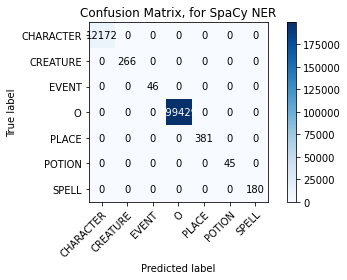

In [14]:
plot_confusion_matrix(docs,classes=get_dataset_labels(),normalize=False)